In [1]:
import pandas as pd                                                         #to clean and filter data
import numpy as np                                                         #for using data as array
import matplotlib.pyplot as plt                                           #for plotting graph of x,y

import sklearn
from sklearn import datasets, linear_model                               #for model we want to predict by
from sklearn.linear_model import LinearRegression                       #for model we want to predict by
from sklearn.metrics import mean_squared_error, r2_score               #for mean error and variance calculation
from sklearn.model_selection import train_test_split                  #spltting training and testing sets

In [2]:
#retrieving and reading CSV using pandas library

world = pd.read_csv(r'covid-vaccination-vs-death_ratio.csv')

#displays up to 50 columns

pd.set_option('display.max_columns', 50)   

#displays up to 20000 rows

pd.set_option('display.max_rows', 100)

In [3]:
#groups up all the similar names under the column, 'country'

count = world.groupby(['country'])

In [4]:
#displays only the latest max data for each group. Also, set to variable 'cleaning'

cleaning = count.max()              

In [5]:
#drop all the columns that are unnecesarily

cleaning.drop(columns=['date'], inplace=True)
cleaning.drop(columns=['Unnamed: 0','iso_code'], inplace=True)
cleaning.drop(columns=['New_deaths'], inplace=True)

In [6]:
#sort from the largest percentage of vaccinated people in descending order

sorting = cleaning.sort_values('Percantage of vaccinated ppl', ascending=False)

In [7]:
#setting a condition that only population with more than 1,000 should be displayed, calling it 'df1'.

df1 = sorting[(sorting.filter(like='population') > 1000).any(axis=1)]

df1 #this result shows a good statistics on vaccination vs death ratio in descending order for the latest date.

,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,ratio,Percantage of vaccinated ppl
country,,,,,,
Gibraltar,116358,42034,41228,33698,124.737373,122.345540
Malta,1255851,473639,466296,443646,106.760570,105.105422
United Arab Emirates,24463702,9890318,9603499,10051436,98.397065,95.543552
Portugal,22923599,9663542,9415073,10150252,95.204947,92.757037
Brunei Darussalam,1068468,407945,404935,443903,91.899582,91.221506
...,...,...,...,...,...,...
Papua New Guinea,574716,317150,257566,9220306,3.439691,2.793465
Yemen,807502,643501,404781,30882462,2.083710,1.310715
Haiti,249801,163710,112335,11623799,1.408404,0.966422


In [8]:
#splitting to independent (x) and dependent (y) variables

x=df1.iloc[:,4].values
y=df1.iloc[:,5].values

In [9]:
#train and test data split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [10]:
#reshaping array to convert from 1D to 2D array

x_test=x_test.reshape(-1,1)
x_train=x_train.reshape(-1,1)

In [11]:
#Variable 'lin_reg' is our model calling model 'linearegression() function'

lin_reg=linear_model.LinearRegression()

In [12]:
#fitting our data in linear regression model
lin_reg.fit(x_train,y_train)


LinearRegression()

In [13]:
#making predictions

lin_reg_pred=lin_reg.predict(x_test)


#coef and intercept are coefficients and intercept respectively for y=mx+c graph in our model.

print("coefficients:\n",lin_reg.coef_)
print("Intercept:\n",lin_reg.intercept_)

#the mean squared error

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, lin_reg_pred))

#explained the variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(y_test, lin_reg_pred))

coefficients:
 [0.96308266]
Intercept:
 -3.1850313238922823
Mean squared error: 27.52
Variance score: 0.96


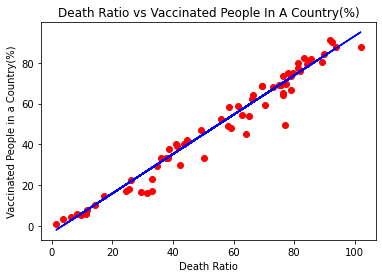

In [14]:
#plotting the graph for test dataset

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, lin_reg_pred, color = 'blue')
plt.title('Death Ratio vs Vaccinated People In A Country(%)')
plt.xlabel('Death Ratio')
plt.ylabel('Vaccinated People in a Country(%)')
plt.show()